In [6]:
import numpy as np
import pandas as pd

import ffn #for loading financial data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

# SPY Price with Overall Sentiment 

In [41]:
#df_spy_viz = pd.read_csv('data/positive+negative_sentiment_data_final.csv')
#org_frequency = pd.read_csv('data/orgs_frequency')
AAPL_sentiments = pd.read_csv('data/aapl_sentiments.csv')

In [40]:
org_frequency.head(5)

,orgs,frequency
0,GME,2044
1,AMC,857
2,EV,396
3,Apple,370
4,WSB,353


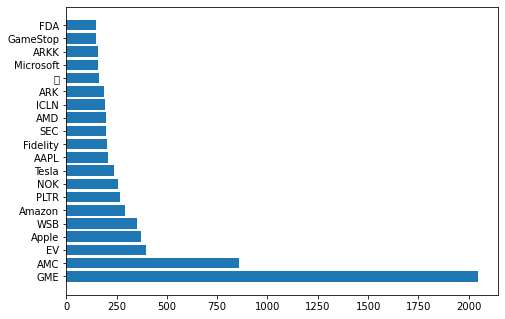

In [39]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
orgs = org_frequency.orgs
frequency = org_frequency['frequency']
ax.barh(orgs,frequency)
plt.show()

In [14]:
df_spy_viz.head()

,date,sentiment_score,spy
0,2021-01-04,2.398160,368.790009
1,2021-01-05,-4.835623,371.329987
2,2021-01-06,-2.440988,373.549988
3,2021-01-07,-4.440185,379.100006
4,2021-01-08,-3.209271,381.260010


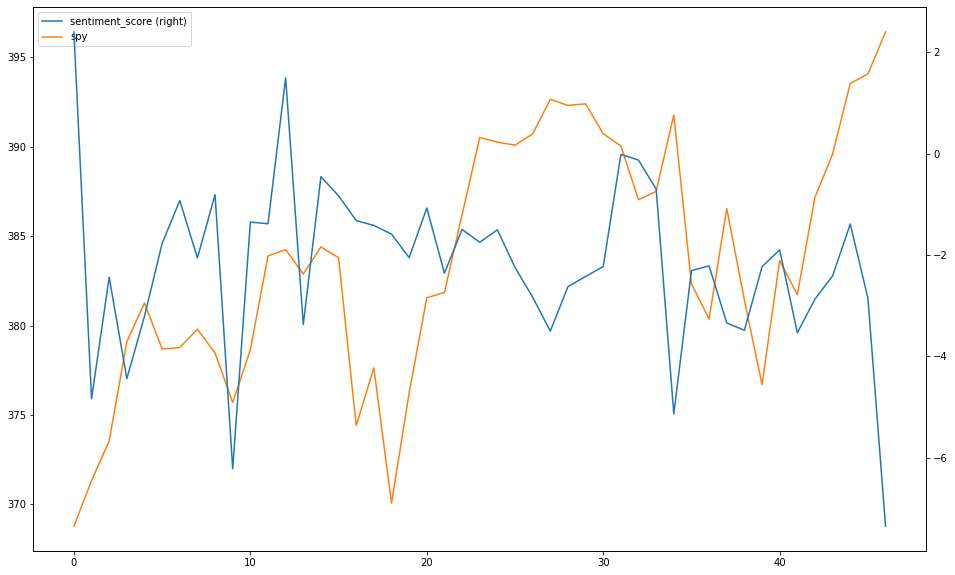

In [15]:
df_spy_viz.plot(secondary_y='sentiment_score', figsize=(16, 10));

## Fourier transforms
### Fourier transforms to smooth the sentiment data. Fourier transforms approximate a function using a series of sine waves. I plot the sentiment data and the Fourier transforms as well.

C:\Users\Yuri\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Yuri\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Yuri\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Yuri\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


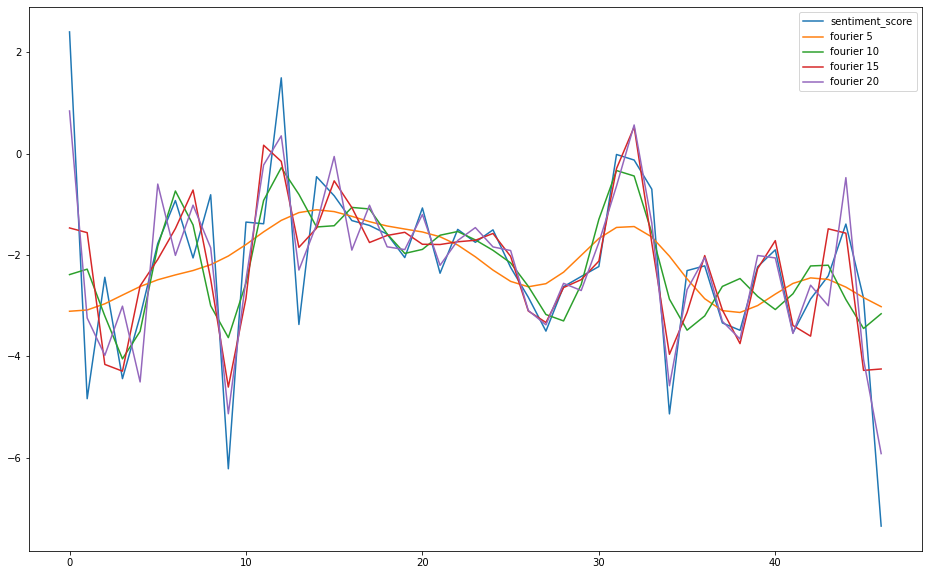

In [16]:
## fourier transform

close_fft = np.fft.fft(np.asarray(df_spy_viz['sentiment_score'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))
fft_list = np.asarray(fft_df['fft'].tolist())

for num_ in [5, 10, 15, 20]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    df_spy_viz['fourier '+str(num_)]=np.fft.ifft(fft_list_m10)
    
df_spy_viz[['sentiment_score', 'fourier 5', 'fourier 10', 'fourier 15', 'fourier 20']].plot(figsize=(16, 10));

C:\Users\Yuri\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


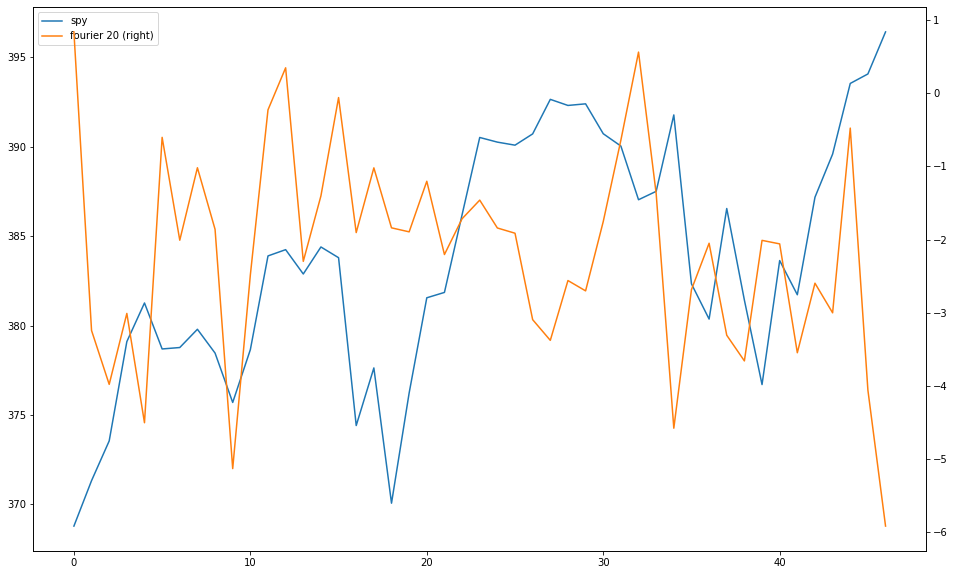

In [17]:
df_spy_viz[['spy', 'fourier 20']].plot(secondary_y='fourier 20', figsize=(16, 10));

<ipython-input-18-87ce7464bace>:7: ComplexWarning: Casting complex values to real discards the imaginary part
  df_spy_viz['norm_fourier5']=sc.fit_transform(np.asarray(list([(float(x)) for x in df_spy_viz['fourier 5'].to_numpy()])).reshape(-1, 1))
<ipython-input-18-87ce7464bace>:8: ComplexWarning: Casting complex values to real discards the imaginary part
  df_spy_viz['norm_fourier10']=sc.fit_transform(np.asarray(list([(float(x)) for x in df_spy_viz['fourier 10'].to_numpy()])).reshape(-1, 1))
<ipython-input-18-87ce7464bace>:9: ComplexWarning: Casting complex values to real discards the imaginary part
  df_spy_viz['norm_fourier15']=sc.fit_transform(np.asarray(list([(float(x)) for x in df_spy_viz['fourier 15'].to_numpy()])).reshape(-1, 1))
<ipython-input-18-87ce7464bace>:10: ComplexWarning: Casting complex values to real discards the imaginary part
  df_spy_viz['norm_fourier20']=sc.fit_transform(np.asarray(list([(float(x)) for x in df_spy_viz['fourier 20'].to_numpy()])).reshape(-1, 1))


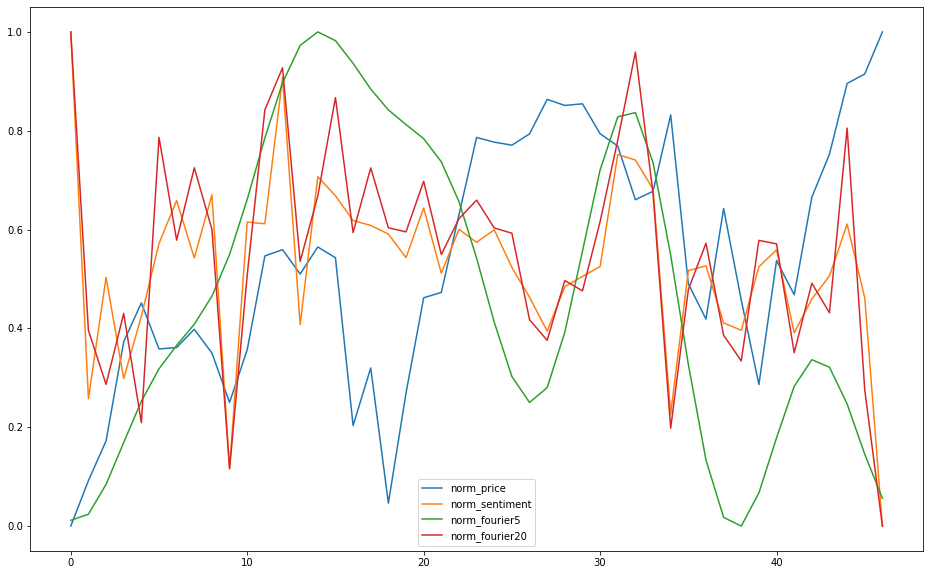

In [18]:
#normalize
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
df_spy_viz['norm_price']=sc.fit_transform(df_spy_viz['spy'].to_numpy().reshape(-1, 1))
df_spy_viz['spy log']=np.log(df_spy_viz['spy']/df_spy_viz['spy'].shift(1))
df_spy_viz['norm_sentiment']=sc.fit_transform(df_spy_viz['sentiment_score'].to_numpy().reshape(-1, 1))
df_spy_viz['norm_fourier5']=sc.fit_transform(np.asarray(list([(float(x)) for x in df_spy_viz['fourier 5'].to_numpy()])).reshape(-1, 1))
df_spy_viz['norm_fourier10']=sc.fit_transform(np.asarray(list([(float(x)) for x in df_spy_viz['fourier 10'].to_numpy()])).reshape(-1, 1))
df_spy_viz['norm_fourier15']=sc.fit_transform(np.asarray(list([(float(x)) for x in df_spy_viz['fourier 15'].to_numpy()])).reshape(-1, 1))
df_spy_viz['norm_fourier20']=sc.fit_transform(np.asarray(list([(float(x)) for x in df_spy_viz['fourier 20'].to_numpy()])).reshape(-1, 1))

df_spy_viz[['norm_price', 'norm_sentiment', 'norm_fourier5', 'norm_fourier20']].plot(figsize=(16, 10));

# GME VIZ

In [51]:
GME_sentiments = pd.read_csv('data/gme_sentiments.csv')

In [52]:
GME_sentiments.head()

,date,sentiment_score,GME
0,2021-01-04,-5.2460,17.250000
1,2021-01-08,-0.9550,17.690001
2,2021-01-11,-0.1730,19.940001
3,2021-01-12,-1.9000,19.950001
4,2021-01-13,-1.5773,31.400000


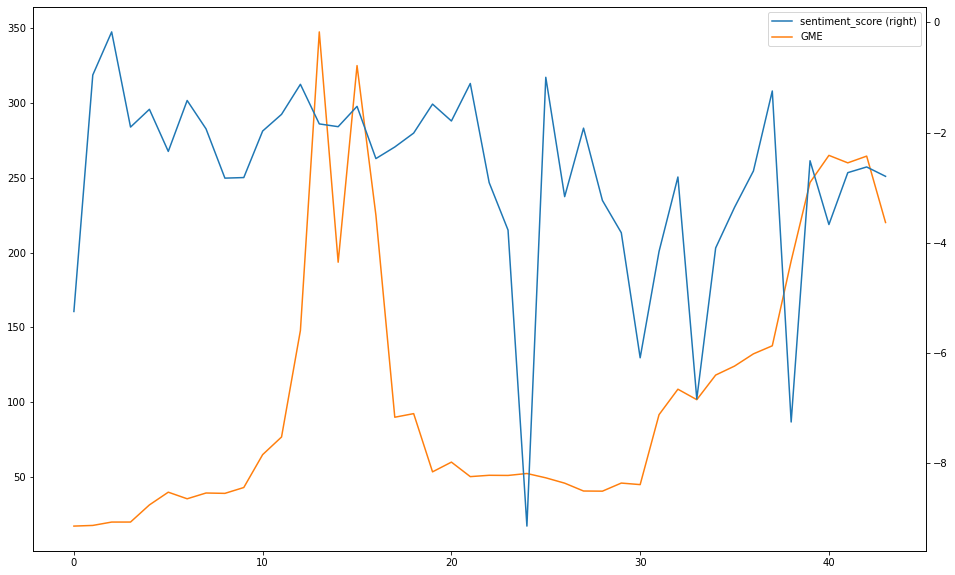

In [53]:
GME_sentiments.plot(secondary_y='sentiment_score', figsize=(16, 10));

C:\Users\Yuri\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Yuri\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Yuri\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Yuri\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


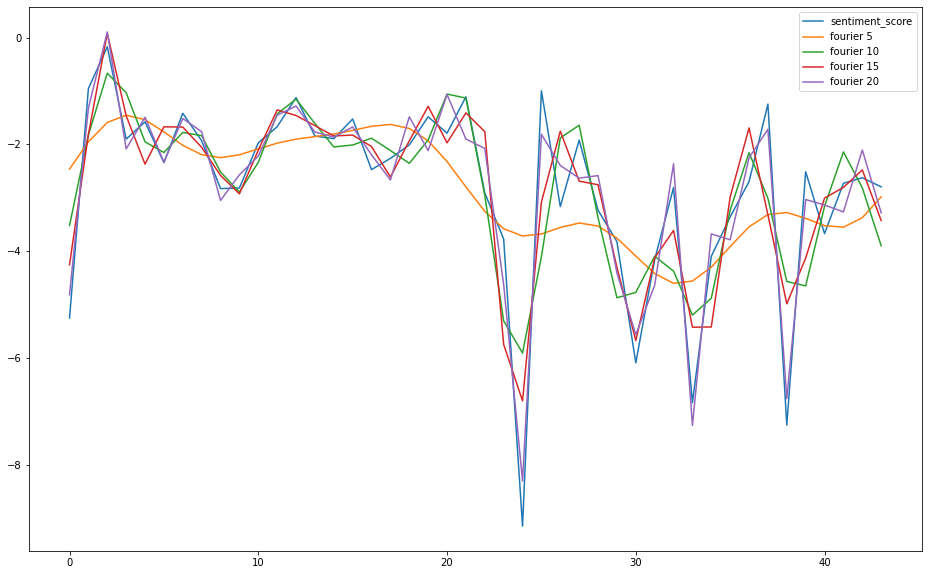

In [54]:
## fourier transform

close_fft = np.fft.fft(np.asarray(GME_sentiments['sentiment_score'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))
fft_list = np.asarray(fft_df['fft'].tolist())

for num_ in [5, 10, 15, 20]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    GME_sentiments['fourier '+str(num_)]=np.fft.ifft(fft_list_m10)
    
GME_sentiments[['sentiment_score', 'fourier 5', 'fourier 10', 'fourier 15', 'fourier 20']].plot(figsize=(16, 10));

C:\Users\Yuri\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


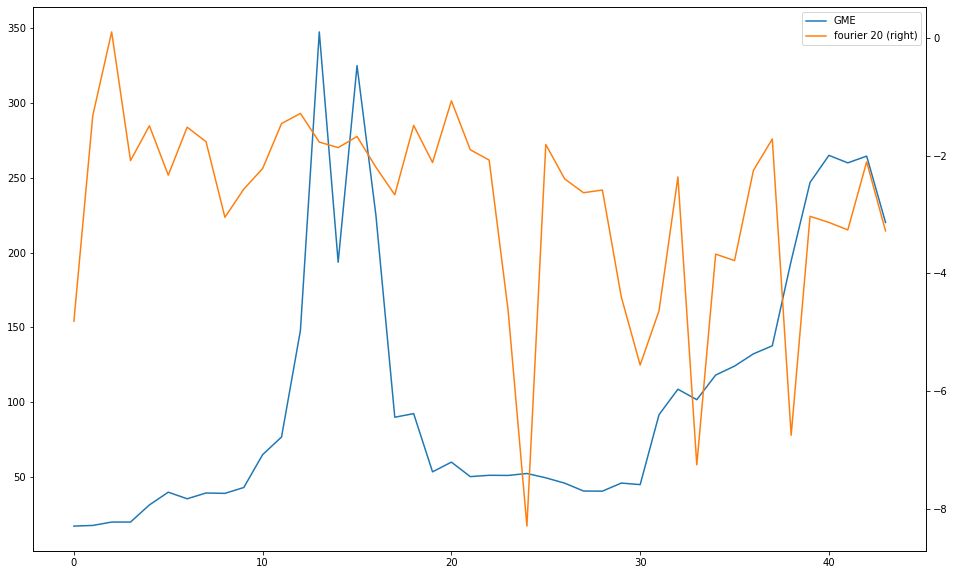

In [55]:
GME_sentiments[['GME', 'fourier 20']].plot(secondary_y='fourier 20', figsize=(16, 10));

<ipython-input-56-34f0493dfa76>:7: ComplexWarning: Casting complex values to real discards the imaginary part
  GME_sentiments['norm_fourier5']=sc.fit_transform(np.asarray(list([(float(x)) for x in GME_sentiments['fourier 5'].to_numpy()])).reshape(-1, 1))
<ipython-input-56-34f0493dfa76>:8: ComplexWarning: Casting complex values to real discards the imaginary part
  GME_sentiments['norm_fourier10']=sc.fit_transform(np.asarray(list([(float(x)) for x in GME_sentiments['fourier 10'].to_numpy()])).reshape(-1, 1))
<ipython-input-56-34f0493dfa76>:9: ComplexWarning: Casting complex values to real discards the imaginary part
  GME_sentiments['norm_fourier15']=sc.fit_transform(np.asarray(list([(float(x)) for x in GME_sentiments['fourier 15'].to_numpy()])).reshape(-1, 1))
<ipython-input-56-34f0493dfa76>:10: ComplexWarning: Casting complex values to real discards the imaginary part
  GME_sentiments['norm_fourier20']=sc.fit_transform(np.asarray(list([(float(x)) for x in GME_sentiments['fourier 20']

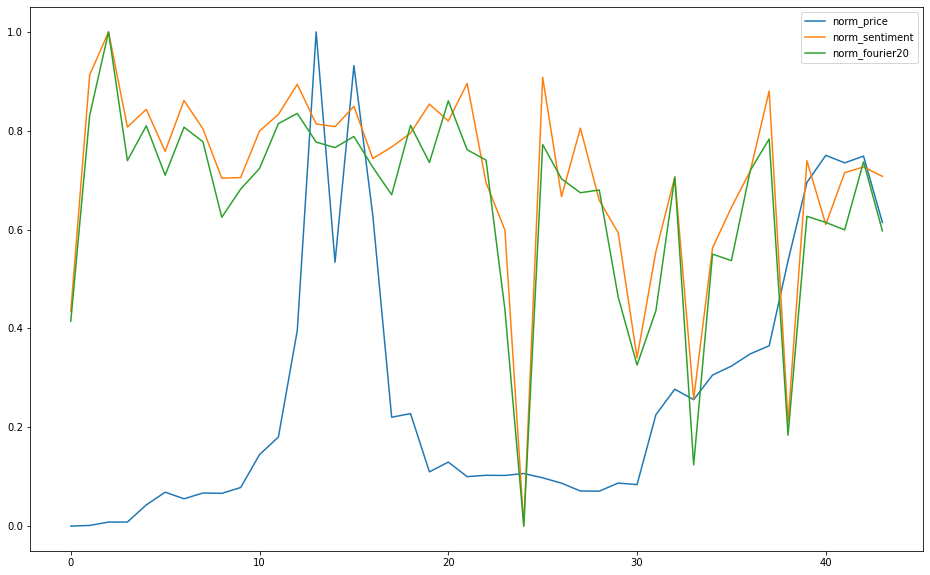

In [56]:
#normalize
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
GME_sentiments['norm_price']=sc.fit_transform(GME_sentiments['GME'].to_numpy().reshape(-1, 1))
GME_sentiments['GME log']=np.log(GME_sentiments['GME']/GME_sentiments['GME'].shift(1))
GME_sentiments['norm_sentiment']=sc.fit_transform(GME_sentiments['sentiment_score'].to_numpy().reshape(-1, 1))
GME_sentiments['norm_fourier5']=sc.fit_transform(np.asarray(list([(float(x)) for x in GME_sentiments['fourier 5'].to_numpy()])).reshape(-1, 1))
GME_sentiments['norm_fourier10']=sc.fit_transform(np.asarray(list([(float(x)) for x in GME_sentiments['fourier 10'].to_numpy()])).reshape(-1, 1))
GME_sentiments['norm_fourier15']=sc.fit_transform(np.asarray(list([(float(x)) for x in GME_sentiments['fourier 15'].to_numpy()])).reshape(-1, 1))
GME_sentiments['norm_fourier20']=sc.fit_transform(np.asarray(list([(float(x)) for x in GME_sentiments['fourier 20'].to_numpy()])).reshape(-1, 1))

GME_sentiments[['norm_price', 'norm_sentiment', 'norm_fourier20']].plot(figsize=(16, 10));

# AMC VIZ

In [57]:
AMC_sentiments = pd.read_csv('data/amc_sentiments.csv')


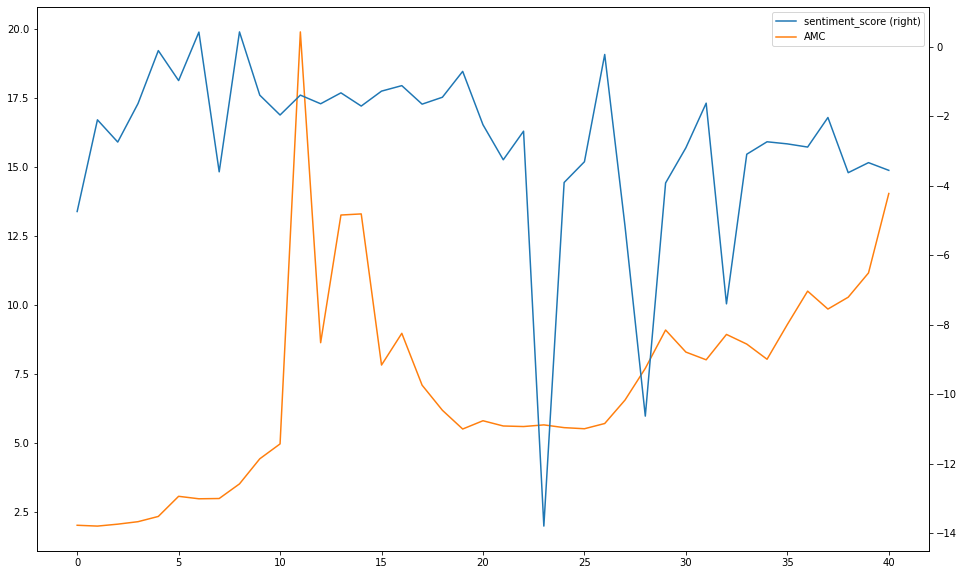

In [59]:
AMC_sentiments.plot(secondary_y='sentiment_score', figsize=(16, 10));

C:\Users\Yuri\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Yuri\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Yuri\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Yuri\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


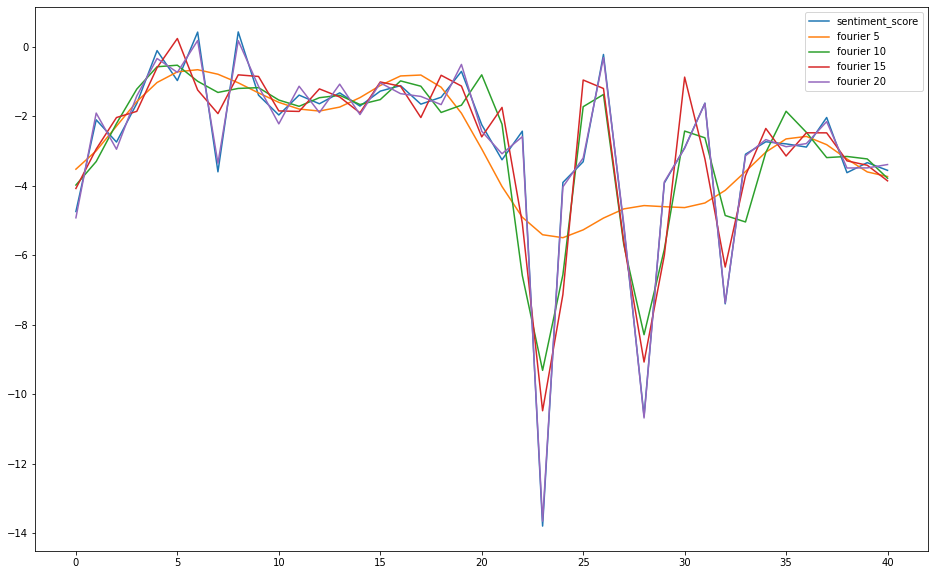

In [60]:
## fourier transform

close_fft = np.fft.fft(np.asarray(AMC_sentiments['sentiment_score'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))
fft_list = np.asarray(fft_df['fft'].tolist())

for num_ in [5, 10, 15, 20]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    AMC_sentiments['fourier '+str(num_)]=np.fft.ifft(fft_list_m10)
    
AMC_sentiments[['sentiment_score', 'fourier 5', 'fourier 10', 'fourier 15', 'fourier 20']].plot(figsize=(16, 10));

C:\Users\Yuri\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


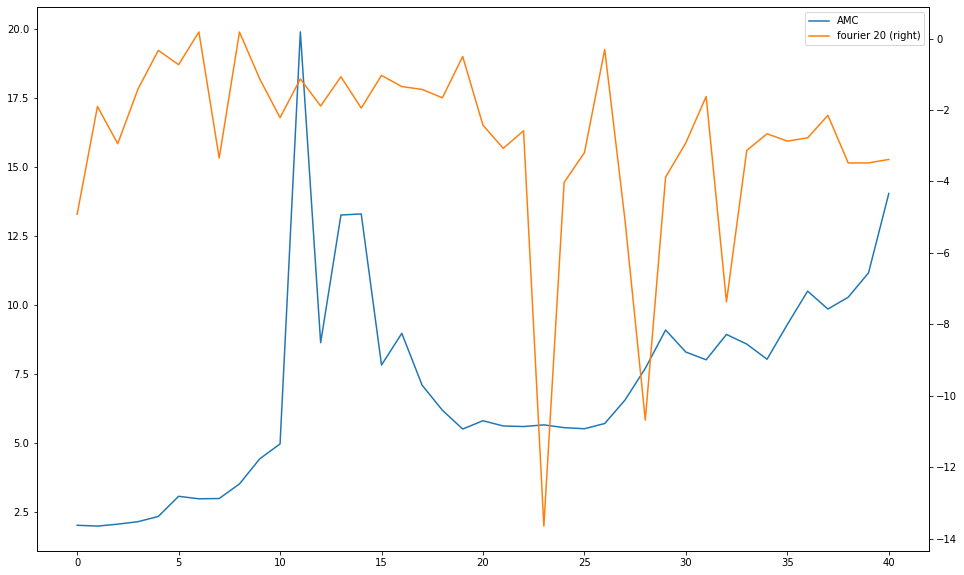

In [61]:
AMC_sentiments[['AMC', 'fourier 20']].plot(secondary_y='fourier 20', figsize=(16, 10));

<ipython-input-66-f2b05f9b90c6>:7: ComplexWarning: Casting complex values to real discards the imaginary part
  AMC_sentiments['norm_fourier5']=sc.fit_transform(np.asarray(list([(float(x)) for x in AMC_sentiments['fourier 5'].to_numpy()])).reshape(-1, 1))
<ipython-input-66-f2b05f9b90c6>:8: ComplexWarning: Casting complex values to real discards the imaginary part
  AMC_sentiments['norm_fourier10']=sc.fit_transform(np.asarray(list([(float(x)) for x in AMC_sentiments['fourier 10'].to_numpy()])).reshape(-1, 1))
<ipython-input-66-f2b05f9b90c6>:9: ComplexWarning: Casting complex values to real discards the imaginary part
  AMC_sentiments['norm_fourier15']=sc.fit_transform(np.asarray(list([(float(x)) for x in AMC_sentiments['fourier 15'].to_numpy()])).reshape(-1, 1))
<ipython-input-66-f2b05f9b90c6>:10: ComplexWarning: Casting complex values to real discards the imaginary part
  AMC_sentiments['norm_fourier20']=sc.fit_transform(np.asarray(list([(float(x)) for x in AMC_sentiments['fourier 20']

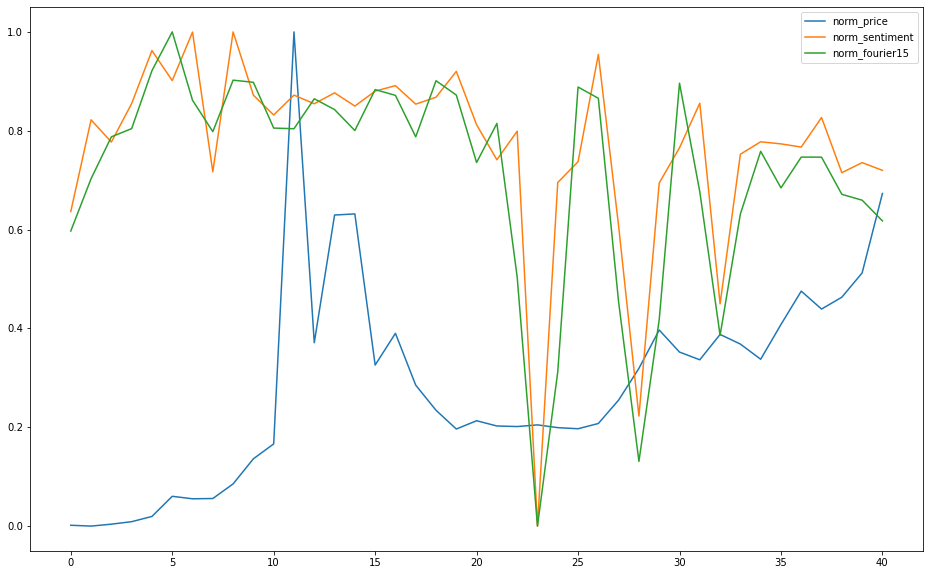

In [66]:
#normalize
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
AMC_sentiments['norm_price']=sc.fit_transform(AMC_sentiments['AMC'].to_numpy().reshape(-1, 1))
AMC_sentiments['AMC log']=np.log(AMC_sentiments['AMC']/AMC_sentiments['AMC'].shift(1))
AMC_sentiments['norm_sentiment']=sc.fit_transform(AMC_sentiments['sentiment_score'].to_numpy().reshape(-1, 1))
AMC_sentiments['norm_fourier5']=sc.fit_transform(np.asarray(list([(float(x)) for x in AMC_sentiments['fourier 5'].to_numpy()])).reshape(-1, 1))
AMC_sentiments['norm_fourier10']=sc.fit_transform(np.asarray(list([(float(x)) for x in AMC_sentiments['fourier 10'].to_numpy()])).reshape(-1, 1))
AMC_sentiments['norm_fourier15']=sc.fit_transform(np.asarray(list([(float(x)) for x in AMC_sentiments['fourier 15'].to_numpy()])).reshape(-1, 1))
AMC_sentiments['norm_fourier20']=sc.fit_transform(np.asarray(list([(float(x)) for x in AMC_sentiments['fourier 20'].to_numpy()])).reshape(-1, 1))

AMC_sentiments[['norm_price', 'norm_sentiment', 'norm_fourier15']].plot(figsize=(16, 10));

# Apple Viz

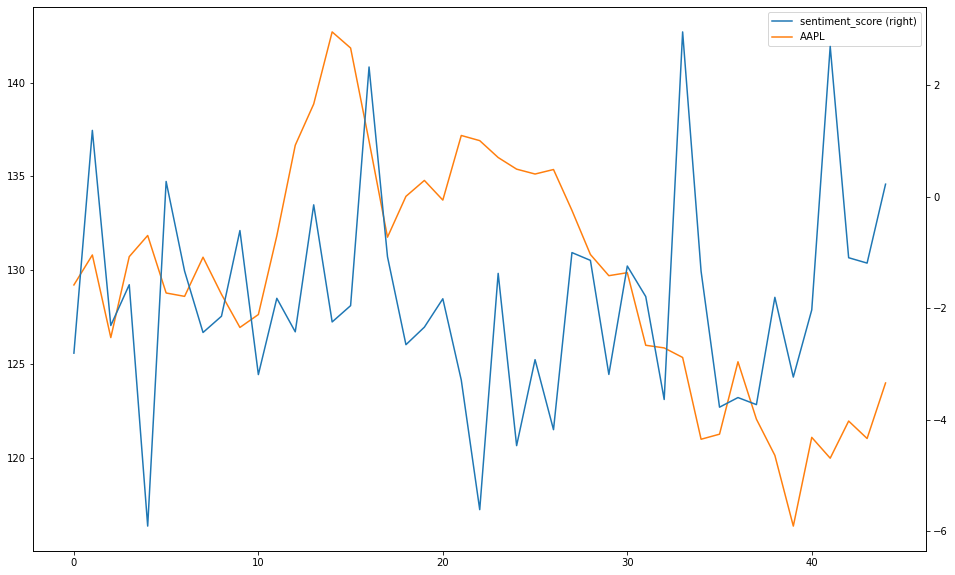

In [43]:
AAPL_sentiments.plot(secondary_y='sentiment_score', figsize=(16, 10));

C:\Users\Yuri\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Yuri\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Yuri\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Yuri\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


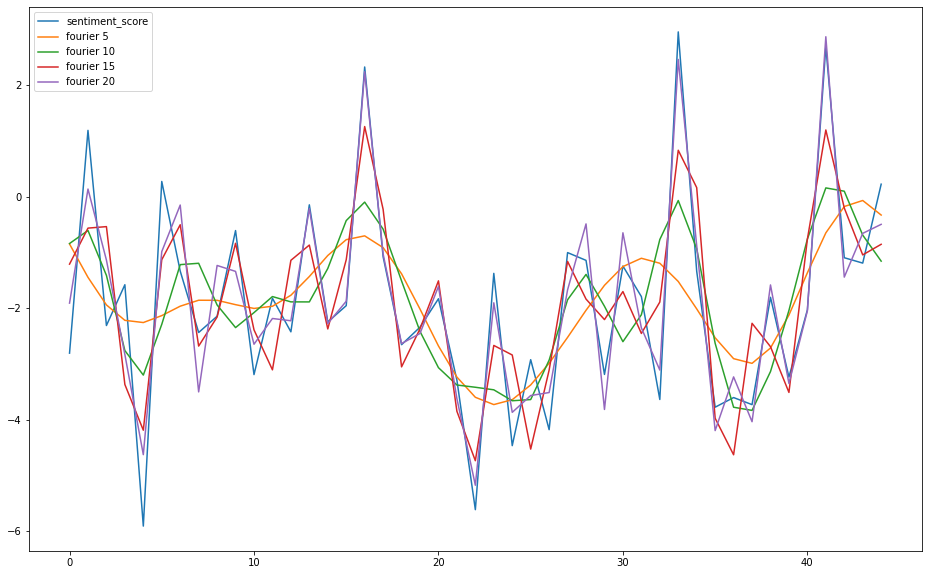

In [44]:
## fourier transform

close_fft = np.fft.fft(np.asarray(AAPL_sentiments['sentiment_score'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))
fft_list = np.asarray(fft_df['fft'].tolist())

for num_ in [5, 10, 15, 20]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    AAPL_sentiments['fourier '+str(num_)]=np.fft.ifft(fft_list_m10)
    
AAPL_sentiments[['sentiment_score', 'fourier 5', 'fourier 10', 'fourier 15', 'fourier 20']].plot(figsize=(16, 10));

C:\Users\Yuri\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


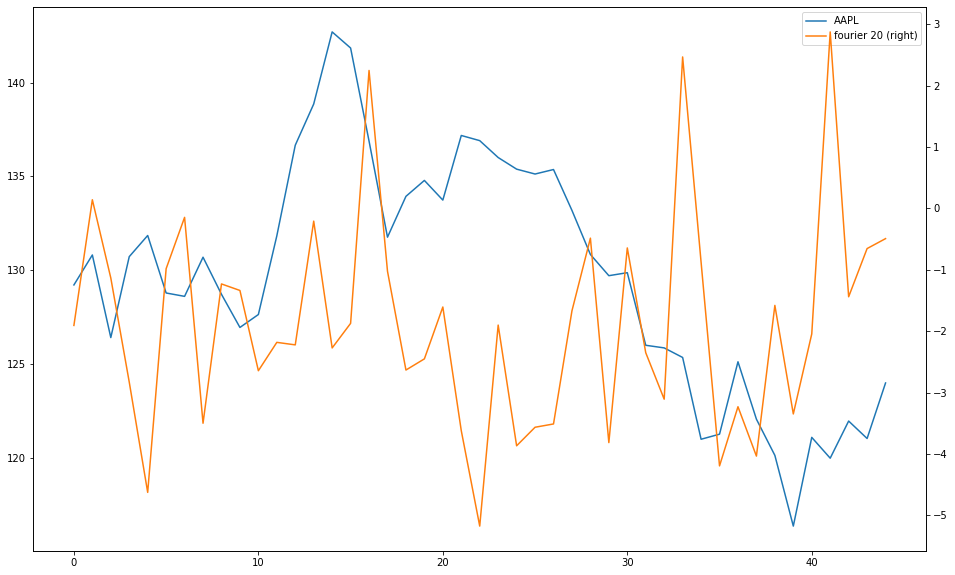

In [46]:
AAPL_sentiments[['AAPL', 'fourier 20']].plot(secondary_y='fourier 20', figsize=(16, 10));

<ipython-input-65-868365a3956d>:7: ComplexWarning: Casting complex values to real discards the imaginary part
  AAPL_sentiments['norm_fourier5']=sc.fit_transform(np.asarray(list([(float(x)) for x in AAPL_sentiments['fourier 5'].to_numpy()])).reshape(-1, 1))
<ipython-input-65-868365a3956d>:8: ComplexWarning: Casting complex values to real discards the imaginary part
  AAPL_sentiments['norm_fourier10']=sc.fit_transform(np.asarray(list([(float(x)) for x in AAPL_sentiments['fourier 10'].to_numpy()])).reshape(-1, 1))
<ipython-input-65-868365a3956d>:9: ComplexWarning: Casting complex values to real discards the imaginary part
  AAPL_sentiments['norm_fourier15']=sc.fit_transform(np.asarray(list([(float(x)) for x in AAPL_sentiments['fourier 15'].to_numpy()])).reshape(-1, 1))
<ipython-input-65-868365a3956d>:10: ComplexWarning: Casting complex values to real discards the imaginary part
  AAPL_sentiments['norm_fourier20']=sc.fit_transform(np.asarray(list([(float(x)) for x in AAPL_sentiments['four

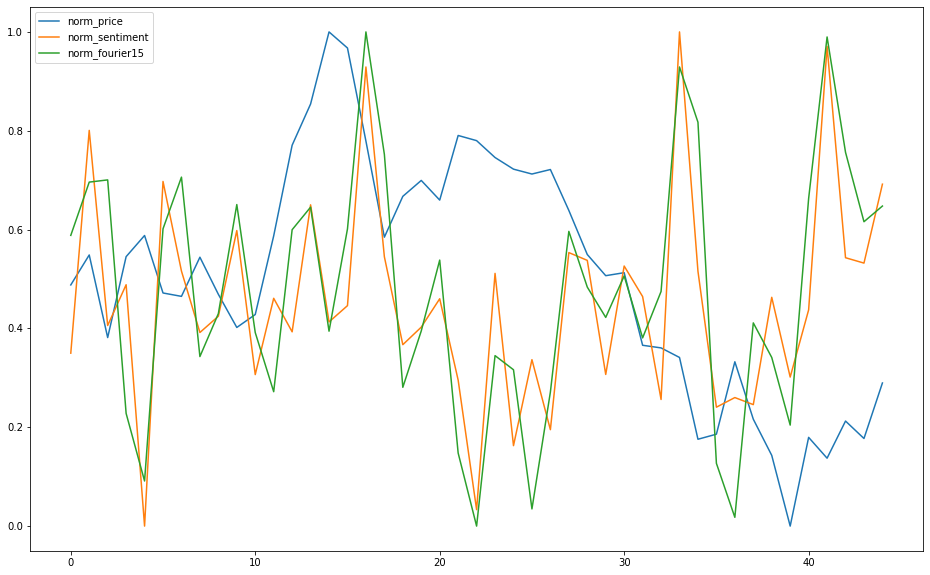

In [65]:
#normalize
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
AAPL_sentiments['norm_price']=sc.fit_transform(AAPL_sentiments['AAPL'].to_numpy().reshape(-1, 1))
AAPL_sentiments['AAPL log']=np.log(AAPL_sentiments['AAPL']/AAPL_sentiments['AAPL'].shift(1))
AAPL_sentiments['norm_sentiment']=sc.fit_transform(AAPL_sentiments['sentiment_score'].to_numpy().reshape(-1, 1))
AAPL_sentiments['norm_fourier5']=sc.fit_transform(np.asarray(list([(float(x)) for x in AAPL_sentiments['fourier 5'].to_numpy()])).reshape(-1, 1))
AAPL_sentiments['norm_fourier10']=sc.fit_transform(np.asarray(list([(float(x)) for x in AAPL_sentiments['fourier 10'].to_numpy()])).reshape(-1, 1))
AAPL_sentiments['norm_fourier15']=sc.fit_transform(np.asarray(list([(float(x)) for x in AAPL_sentiments['fourier 15'].to_numpy()])).reshape(-1, 1))
AAPL_sentiments['norm_fourier20']=sc.fit_transform(np.asarray(list([(float(x)) for x in AAPL_sentiments['fourier 20'].to_numpy()])).reshape(-1, 1))

AAPL_sentiments[['norm_price', 'norm_sentiment', 'norm_fourier15']].plot(figsize=(16, 10));

# Topic Modeling

In [70]:
import re 
import numpy as np 
import pandas as pd 

#Gensim 
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization 
import spacy 

#plotting tools 
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt 


import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

# NLTK stop words
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')

In [67]:
subreddit_stocks = pd.read_csv('data/reddit_stocks')

In [73]:
# Prepare stopwords 
stop_words = stopwords.words('english')

In [78]:
subreddit_stocks = subreddit_stocks[['date', 'author', 'post']]
subreddit_stocks.head()

,date,author,post
0,2021-01-01,izgustant,Question about the 2021 stocks and your opinio...
1,2021-01-01,Andymilonakis21,So I hear a lot of people say don’t do options...
2,2021-01-01,PuzzledMindAndBody,Index Funds:Stocks Allocation[removed]
3,2021-01-01,bigbang1996,High confidence - NioAccording to a JD power s...
4,2021-01-01,PuzzledMindAndBody,Index Funds:Stocks Allocation %[removed]


In [79]:
# Convert to list 

subreddit_stocks_posts = subreddit_stocks.post.tolist()

In [80]:
#Tokenize words and clean-up text 

def sent_to_words(sentences):
    for sentence in sentences:
         # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence))) 

subreddit_stocks_posts_words = list(sent_to_words(subreddit_stocks_posts))

print(subreddit_stocks_posts_words[:1])

[['question', 'about', 'the', 'stocks', 'and', 'your', 'opinions', 'don', 'want', 'to', 'sound', 'like', 'dumbass', 'am', 'asking', 'for', 'your', 'opinion', 'dear', 'future', 'stonk', 'millionaires', 'first', 'of', 'all', 'happy', 'new', 'year', 'hope', 'brings', 'joy', 'and', 'wellbeing', 'to', 'all', 'of', 'you', 'not', 'just', 'money', 'now', 'to', 'the', 'topic', 'recently', 'read', 'couple', 'of', 'articles', 'about', 'how', 'market', 'are', 'overflowing', 'with', 'money', 'and', 'basically', 'present', 'bubble', 'talking', 'about', 'sp', 'nasdaq', 'etc', 'im', 'newbie', 'don', 'judge', 'the', 'way', 'see', 'it', 'is', 'that', 'because', 'most', 'of', 'the', 'irl', 'businesses', 'are', 'closed', 'money', 'has', 'to', 'go', 'somewhere', 'and', 'where', 'else', 'than', 'stocks', 'and', 'market', 'value', 'do', 'you', 'think', 'that', 'having', 'in', 'mind', 'the', 'covid', 'situation', 'markets', 'will', 'continue', 'to', 'go', 'up', 'with', 'the', 'exception', 'of', 'similar', 'or

In [81]:
# Creating Bigram and Trigram model
# bigrams are two words frequently occuring together, trigram is 3 words

# Build the bigram and trigram model 
bigram = gensim.models.Phrases(subreddit_stocks_posts_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[subreddit_stocks_posts_words], threshold=100) 

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[subreddit_stocks_posts_words[1]]])

['so', 'hear', 'lot', 'of', 'people', 'say', 'don', 'do', 'options', 'but', 'hear', 'if', 'you', 'learn', 'how', 'to', 'do', 'them', 'you', 'can', 'make', 'insane', 'amounts', 'is', 'it', 'really', 'worth', 'it', 'to', 'learn', 'it', 'removed']


In [82]:
# Remove stopwords, make bigrams and lemmatize

# Define function for stopwords, bigrams, trigrams and lemmatization 

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts): 
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts): 
    return [trigram_mod[bigram_mod[doc]] for doc in texts]


def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [84]:
# pipeline 

# Remove Stop words 
data_words_nostops = remove_stopwords(subreddit_stocks_posts_words)

# form bigrams 
data_words_bigrams = make_bigrams(subreddit_stocks_posts_words)

#data_words_bigrams[1]


In [85]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load("en_core_web_sm")

data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

data_lemmatized[1]

['so',
 'hear',
 'lot',
 'people',
 'say',
 'don',
 'do',
 'option',
 'hear',
 'learn',
 'how',
 'do',
 'make',
 'insane',
 'amount',
 'really',
 'worth',
 'learn',
 'remove']

In [86]:
""" 
Gensim creates a unique id for each word in the document. The produced corpus shown above is a mapping of (word_id, word_frequency).
For example, (0, 1) above implies, word id 0 occurs once in the first document. Likewise, word id 1 occurs twice and so on.
This is used as the input by the LDA Model.
"""

#Create the Dictionary and Corpus needed for Topic Modeling

# Create Dictionary 

dictionary  = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency 
corpus = [dictionary.doc2bow(text) for text in texts]

# View 
#print(corpus)

In [87]:
import pickle

pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [97]:
NUM_TOPICS = 5
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
#ldamodel.save('model5.gensim')

In [ ]:
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

In [93]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')

In [94]:
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

In [98]:
# 3 Topics
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 3, id2word=dictionary, passes=15)
ldamodel.save('model3.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.020*"com" + 0.018*"https" + 0.017*"amp" + 0.015*"be"')
(1, '0.035*"be" + 0.020*"stock" + 0.015*"have" + 0.010*"buy"')
(2, '0.232*"remove" + 0.052*"stock" + 0.018*"buy" + 0.012*"gme"')


In [99]:
lda3 = gensim.models.ldamodel.LdaModel.load('model3.gensim')
lda_display3 = pyLDAvis.gensim.prepare(lda3, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display3)